In [70]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
path = "E:/Hackathon/SegmindAIChallenge/dataset/"
df_train = pd.read_csv(path + 'TRAIN.csv')
df_test = pd.read_csv(path + 'TEST.csv')


C:\Users\basto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
df_test.shape

(305163, 7)

In [73]:
df_train['Sales'].value_counts()

0        122098
5674        163
5697        142
5723        142
6214        141
          ...  
23005         1
18521         1
16472         1
18071         1
1118          1
Name: Sales, Length: 20727, dtype: int64

## Reduce 0's from trainset

In [74]:
# Reduce huge number of 0's in df_train

df_train['Sales'].value_counts()

0        122098
5674        163
5697        142
5723        142
6214        141
          ...  
23005         1
18521         1
16472         1
18071         1
1118          1
Name: Sales, Length: 20727, dtype: int64

In [75]:
df_train = df_train.sample(frac = 1)

In [76]:
df_train = df_train[df_train['Sales']!=0]

In [77]:
xdf = df_train.copy()

In [78]:
xdf['Sales'].value_counts()

5674     163
5723     142
5697     142
6214     141
5818     141
        ... 
22232      1
21559      1
19579      1
30428      1
20557      1
Name: Sales, Length: 20726, dtype: int64

In [79]:
xdf = xdf.sample(frac = 1)
xdf = xdf.iloc[:305163]

In [80]:
xdf['Sales'].value_counts()

6439     83
5674     82
4383     80
5619     79
5723     78
         ..
18213     1
28448     1
16322     1
18818     1
19761     1
Name: Sales, Length: 18453, dtype: int64

In [81]:
xdf.shape

(305163, 9)

In [82]:
df_test.shape

(305163, 7)

# Observe Dataset

In [83]:
xdf.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
518738,1049,1,2014-03-24,3482,611,1,0,0,0
52265,976,1,2015-06-15,11796,991,1,1,0,0
439423,899,2,2014-06-03,7808,786,1,1,0,0
695310,336,3,2013-10-16,11009,1772,1,0,0,1
53712,193,6,2015-06-13,4580,718,1,0,0,0


In [84]:
# Extract year, month and day from 'Date'

In [85]:
xdf['Date']

518738    2014-03-24
52265     2015-06-15
439423    2014-06-03
695310    2013-10-16
53712     2015-06-13
             ...    
335422    2014-09-17
704396    2013-10-08
275447    2014-11-20
89563     2015-05-12
702927    2013-10-09
Name: Date, Length: 305163, dtype: object

In [86]:
xdf['Date'] = pd.to_datetime(xdf['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [87]:
xdf['Date']

518738   2014-03-24
52265    2015-06-15
439423   2014-06-03
695310   2013-10-16
53712    2015-06-13
            ...    
335422   2014-09-17
704396   2013-10-08
275447   2014-11-20
89563    2015-05-12
702927   2013-10-09
Name: Date, Length: 305163, dtype: datetime64[ns]

In [88]:
xdf['Year'] = xdf['Date'].dt.year
xdf['Month'] = xdf['Date'].dt.month
xdf['Day'] = xdf['Date'].dt.day


df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day


In [89]:
xdf.drop('Date', axis = 1, inplace = True)
df_test.drop('Date', axis = 1, inplace = True)

In [90]:
xdf.shape

(305163, 11)

In [91]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305163 entries, 518738 to 702927
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Sales          305163 non-null  int64 
 3   Customers      305163 non-null  int64 
 4   Open           305163 non-null  int64 
 5   Promo          305163 non-null  int64 
 6   StateHoliday   305163 non-null  object
 7   SchoolHoliday  305163 non-null  int64 
 8   Year           305163 non-null  int64 
 9   Month          305163 non-null  int64 
 10  Day            305163 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 27.9+ MB


In [92]:
xdf['StateHoliday'].values

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [93]:
xdf['StateHoliday'].value_counts()

0    246978
0     57827
a       266
b        57
c        35
Name: StateHoliday, dtype: int64

In [94]:
df_test['StateHoliday'].value_counts()

0    297219
a      5714
b      2230
Name: StateHoliday, dtype: int64

In [95]:
xdf['StateHoliday'] = xdf['StateHoliday'].replace({'0':'0','a':'1','b':'1','c':'1'})

In [96]:
xdf['StateHoliday'].value_counts()

0    246978
0     57827
1       358
Name: StateHoliday, dtype: int64

In [97]:
df_test['StateHoliday'] = df_test['StateHoliday'].replace({'a':'1','b':'1'})

In [98]:
xdf['StateHoliday'] = pd.to_numeric(xdf['StateHoliday'])

In [99]:
df_test['StateHoliday'] = pd.to_numeric(df_test['StateHoliday'])

In [100]:
# let's recheck 

xdf['StateHoliday'].value_counts()

0    304805
1       358
Name: StateHoliday, dtype: int64

In [101]:
df_test['StateHoliday'].value_counts()

0    297219
1      7944
Name: StateHoliday, dtype: int64

In [102]:
xdf.drop(['Customers','Open'], axis =1 , inplace = True)

This are converted to Numeric and fixed.

In [103]:
# school holiday

xdf['SchoolHoliday'].value_counts()

0    248860
1     56303
Name: SchoolHoliday, dtype: int64

<AxesSubplot:>

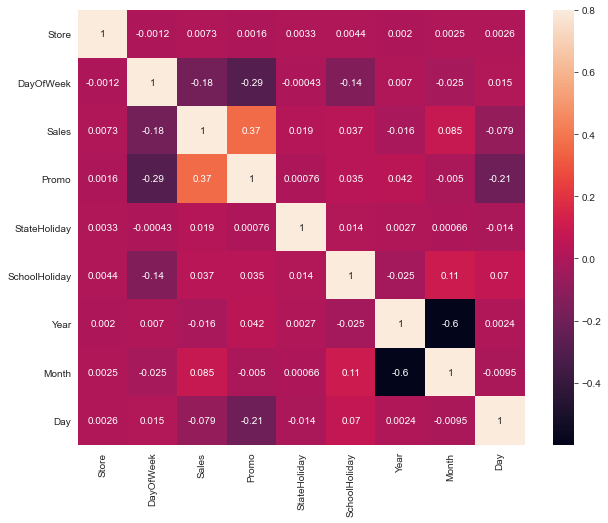

In [104]:
corr = xdf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True)

# Exploratory Data Analaysis

## Univariate (Target Attribute)

In [105]:
xdf['Sales'].value_counts()

6439     83
5674     82
4383     80
5619     79
5723     78
         ..
18213     1
28448     1
16322     1
18818     1
19761     1
Name: Sales, Length: 18453, dtype: int64

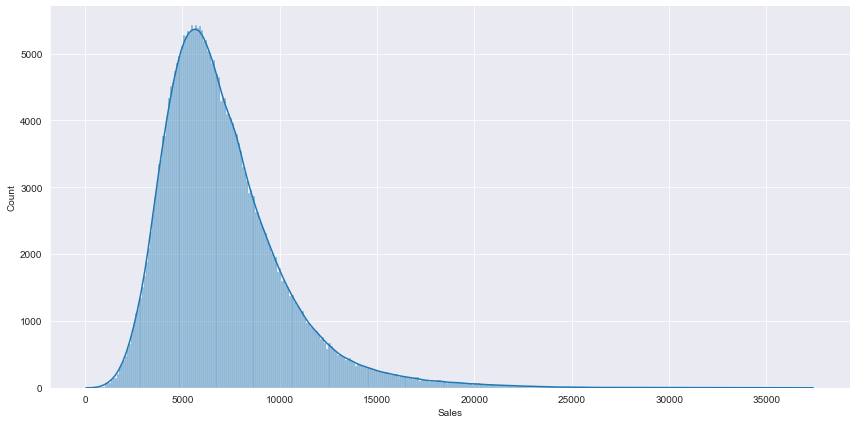

In [106]:
## Lets check its distribution

sns.displot(x = 'Sales', data = xdf, aspect = 2, height = 6, kde = True);

In [107]:
# Skew and kurt
print("Skewness: %f" % xdf['Sales'].skew())
print("Kurtosis: %f" % xdf['Sales'].kurt())

Skewness: 1.586689
Kurtosis: 4.738181


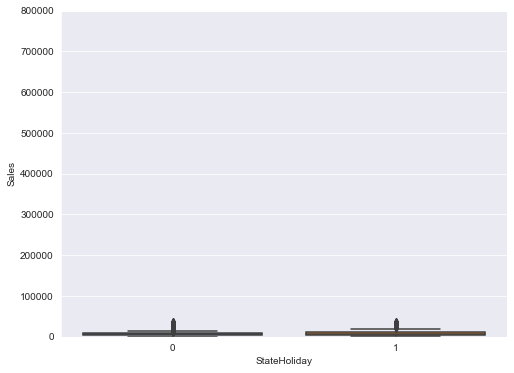

In [108]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Sales'], xdf['StateHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['StateHoliday'], y="Sales", data=data)
fig.axis(ymin=0, ymax=800000);

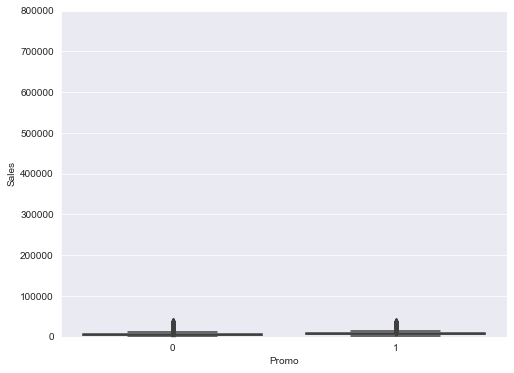

In [109]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Sales'], xdf['Promo']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['Promo'], y="Sales", data=data)
fig.axis(ymin=0, ymax=800000);

In [110]:
xdf['Sales'].value_counts()

6439     83
5674     82
4383     80
5619     79
5723     78
         ..
18213     1
28448     1
16322     1
18818     1
19761     1
Name: Sales, Length: 18453, dtype: int64

# Feature Engineering

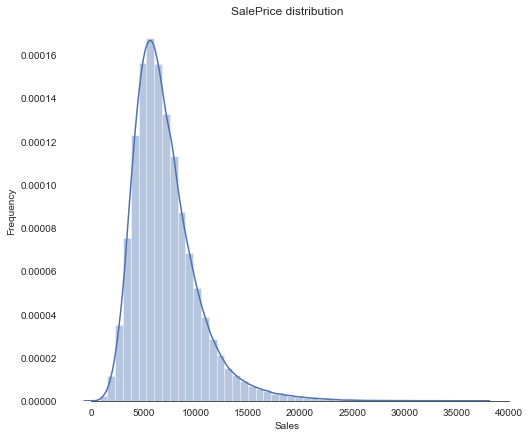

In [111]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Sales'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The Sales is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) transform to fix the skew.

In [112]:
from scipy.stats import skew, norm

In [113]:
xdf['Sales'] = np.log1p(xdf['Sales'])


 mu = 8.78 and sigma = 0.42



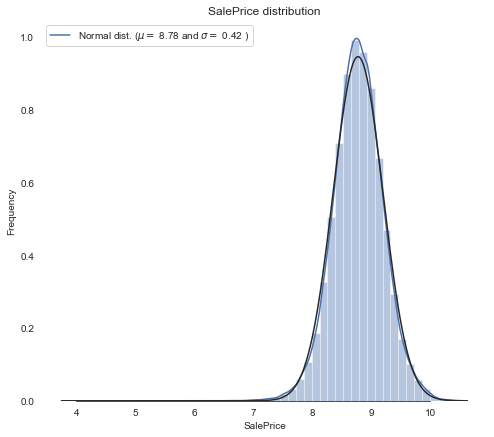

In [114]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Sales'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(xdf['Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [115]:
xdf.shape

(305163, 9)

## Correlation

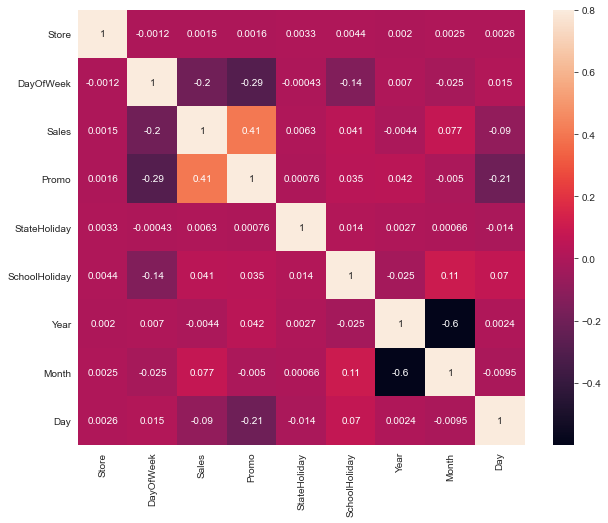

In [116]:
# Let's check the correlation of the feature with target

corr = xdf.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True);

In [117]:
xdf.shape

(305163, 9)

In [118]:
xdf

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
518738,1049,1,8.155649,0,0,0,2014,3,24
52265,976,1,9.375601,1,0,0,2015,6,15
439423,899,2,8.963032,1,0,0,2014,6,3
695310,336,3,9.306559,0,0,1,2013,10,16
53712,193,6,8.429673,0,0,0,2015,6,13
...,...,...,...,...,...,...,...,...,...
335422,1035,3,8.410943,1,0,0,2014,9,17
704396,502,2,9.457747,1,0,0,2013,10,8
275447,876,4,9.138952,0,0,0,2014,11,20
89563,364,2,8.454253,0,0,0,2015,5,12


In [119]:
df_test

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,767,1,0,0,1,1,2013,4,1
1,1111,6,1,0,0,0,2013,3,16
2,45,4,1,1,0,1,2013,8,1
3,500,4,1,0,0,1,2013,5,23
4,82,2,1,0,0,1,2013,8,6
...,...,...,...,...,...,...,...,...,...
305158,412,2,1,1,0,1,2013,5,28
305159,936,6,1,0,0,0,2013,3,2
305160,21,1,1,0,0,0,2013,9,16
305161,1077,6,1,0,0,0,2013,6,22


In [120]:
df_train.shape

(589948, 9)

# Dataset Preparation

In [121]:
# Splitting the dataset

X = xdf.drop(['Sales'], axis =1)
y = xdf['Sales']

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [125]:
(X_train.shape, X_test.shape)

((244130, 8), (61033, 8))

In [126]:
X_test

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
421974,175,3,1,0,0,2014,6,18
107601,562,7,0,0,0,2015,4,26
501272,308,2,0,0,0,2014,4,8
338680,459,6,0,0,0,2014,9,13
489154,455,6,0,0,0,2014,4,19
...,...,...,...,...,...,...,...,...
553720,351,4,1,0,0,2014,2,20
658723,544,1,1,0,0,2013,11,18
704215,321,2,1,0,0,2013,10,8
360991,313,3,1,0,1,2014,8,20


### Preprocessing

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
ct = ColumnTransformer([
                ('scaler', StandardScaler(),['Store','DayOfWeek','Year','Month','Day'])
], remainder = 'passthrough')

# Modeling and Evaluation Metrics

In [129]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [130]:
models = pd.DataFrame(columns = ['R2_score','MSE','RMSE','MAE'])

## Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
lr = LinearRegression()
lr_pipe = Pipeline([
            ('column-transformer', ct),
            ('LinearRegression', lr)
])

In [133]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'DayOfWeek', 'Year',
                                                   'Month', 'Day'])])),
                ('LinearRegression', LinearRegression())])

In [134]:
lr_pred = lr_pipe.predict(X_test)

In [135]:
print("R2 Score:", r2_score(y_test, lr_pred))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test, lr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_pred)))

R2 Score: 0.18215417476845996
Mean Squarred Error: 0.147
RMSE: 0.38330458041628146
Mean Absolute Error : 0.2971507900319457


## GradientBoostingRegressor

In [136]:
from sklearn.ensemble import GradientBoostingRegressor


In [137]:
gbr = GradientBoostingRegressor()

In [138]:
gbr_pipe = Pipeline([
            ('column-transformer', ct),
            ('GradientBoostingRegressor', gbr)
])

In [139]:
gbr_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'DayOfWeek', 'Year',
                                                   'Month', 'Day'])])),
                ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [140]:
gbr_pred = gbr_pipe.predict(X_test)

In [141]:
print("R2 Score:", r2_score(y_test, gbr_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, gbr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,gbr_pred)))

R2 Score: 0.32114492571711506
Mean Squarred Error: 0.12195332496357165
RMSE: 0.3492181624193846
Mean Absolute Error : 0.270986909116669


In [142]:
from xgboost import XGBRegressor

In [143]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.05)
xgb_pipe = Pipeline([
            ('column-transformer', ct),
            ('XGBRegression', xgb)
])

In [144]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'DayOfWeek', 'Year',
                                                   'Month', 'Day'])])),
                ('XGBRegression',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=8, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda

In [145]:
xgb_pred = xgb_pipe.predict(X_test)

In [146]:
print("R2 Score:", r2_score(y_test, xgb_pred))
print("Mean Squarred Error: %.3f " % mean_squared_error(y_test, xgb_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, xgb_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,xgb_pred)))

R2 Score: 0.3568763998154969
Mean Squarred Error: 0.116 
RMSE: 0.33990340241670086
Mean Absolute Error : 0.2641928556108499


In [550]:
real_ytest = np.floor(np.expm1(y_test))

In [556]:
print("RMSE:", math.sqrt(mean_squared_error(real_ytest, xgb_pred)))

RMSE: 7740.855918352478


In [534]:
df_test.shape

(305163, 9)

In [535]:
X_train.shape

(244130, 9)

In [540]:
# Submission
xgb_pred = xgb_pipe.predict(df_test)

In [541]:
output = pd.DataFrame(columns = ['Index','Sales'])

In [542]:
output['Index'] = df_test.index

In [545]:
output

,Index,Sales
0,0,0.0
1,1,3523.0
2,2,7205.0
3,3,5211.0
4,4,5219.0
...,...,...
305158,305158,7929.0
305159,305159,5246.0
305160,305160,5194.0
305161,305161,4781.0


In [544]:
output['Sales'] = np.floor(np.expm1(xgb_pipe.predict(df_test)))

In [546]:
output.to_csv('output.csv', index = False)

In [547]:
mysub= pd.read_csv('output.csv')

In [548]:
mysub

,Index,Sales
0,0,0.0
1,1,3523.0
2,2,7205.0
3,3,5211.0
4,4,5219.0
...,...,...
305158,305158,7929.0
305159,305159,5246.0
305160,305160,5194.0
305161,305161,4781.0


## 2,321.8847 << Public Score